In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
MLII_100_PATH = 'data/100_MLII.dat'
attr_100_PATH = 'data/100_attr.dat'
V5_100_PATH = 'data/100_V5.dat'

attr_102_PATH = 'data/102_attr.dat'
V2_102_PATH = 'data/102_V2.dat'
V5_102_PATH = 'data/102_V5.dat'

attr_228_PATH = 'data/228_attr.dat'
MLII_228_PATH = 'data/228_MLII.dat'
V1_228_PATH = 'data/228_V1.dat'

In [3]:
def read_data(file):
    
    df = pd.read_csv(file, delimiter = '\t', header = None)
    
    print(df.head())
    print(df.shape)
    
    return df

In [4]:
MLII_100 = read_data(MLII_100_PATH)
attr_100 = read_data(attr_100_PATH)
V5_100 = read_data(V5_100_PATH)
attr_102 = read_data(attr_102_PATH)
V2_102 = read_data(V2_102_PATH)
V5_102 = read_data(V5_102_PATH)
attr_228 = read_data(attr_228_PATH)
MLII_228 = read_data(MLII_228_PATH)
V1_228 = read_data(V1_228_PATH)

       0
0 -0.145
1 -0.145
2 -0.145
3 -0.145
4 -0.145
(650000, 1)
      0  1
0    77  N
1   370  N
2   662  N
3   946  N
4  1231  N
(2273, 2)
       0
0 -0.065
1 -0.065
2 -0.065
3 -0.065
4 -0.065
(650000, 1)
      0  1
0   136  /
1   410  /
2   697  /
3   989  /
4  1305  /
(2187, 2)
       0
0  0.005
1  0.005
2  0.005
3  0.005
4  0.005
(650000, 1)
     0
0 -0.2
1 -0.2
2 -0.2
3 -0.2
4 -0.2
(650000, 1)
      0  1
0   160  N
1   433  N
2   726  N
3  1061  N
4  1366  N
(2053, 2)
       0
0 -0.155
1 -0.155
2 -0.155
3 -0.155
4 -0.155
(650000, 1)
       0
0 -0.095
1 -0.095
2 -0.095
3 -0.095
4 -0.095
(650000, 1)


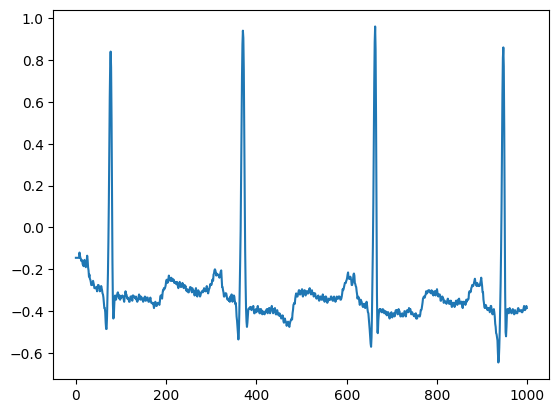

In [5]:
plt.plot(MLII_100[0][:1000])

### Filtrowanie

fc = (fc/fs) / 2

In [6]:
fc_norm_hp = (5/360)/2
fc_norm_lp = (15/360)/2

In [7]:
M = 100

In [8]:
def h_lp(M, fc):
    h = np.sin(2*np.pi*fc*np.arange(-M,M))/(np.pi*np.arange(-M,M))
    h[M] = 2*fc
    return h

def h_hp(M, fc):
    h =  -1 * np.sin(2*np.pi*fc*np.arange(-M,M))/(np.pi*np.arange(-M,M))
    h[M] = 1 - 2*fc
    return h

C:\Users\piotr\AppData\Local\Temp\ipykernel_19552\1791396930.py:2: RuntimeWarning: invalid value encountered in divide
  h = np.sin(2*np.pi*fc*np.arange(-M,M))/(np.pi*np.arange(-M,M))
C:\Users\piotr\AppData\Local\Temp\ipykernel_19552\1791396930.py:7: RuntimeWarning: invalid value encountered in divide
  h =  -1 * np.sin(2*np.pi*fc*np.arange(-M,M))/(np.pi*np.arange(-M,M))


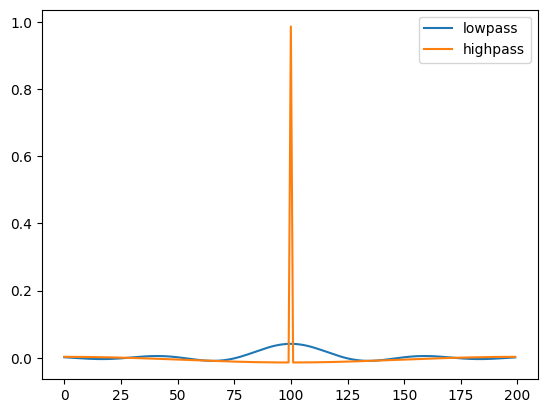

In [9]:
plt.plot(h_lp(M, fc_norm_lp))
plt.plot(h_hp(M, fc_norm_hp))
plt.legend(['lowpass', 'highpass'])

In [10]:
def hamming(n):
    w = 0.54 - 0.46 * np.cos(2*np.pi*np.arange(n)/(n-1))
    return w

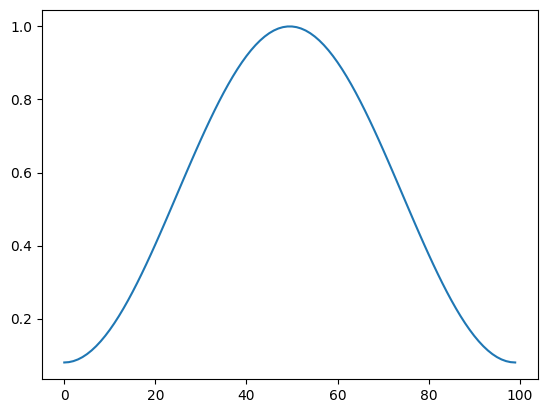

In [11]:
plt.plot(hamming(100))

### Usage of filters

C:\Users\piotr\AppData\Local\Temp\ipykernel_19552\1791396930.py:7: RuntimeWarning: invalid value encountered in divide
  h =  -1 * np.sin(2*np.pi*fc*np.arange(-M,M))/(np.pi*np.arange(-M,M))
C:\Users\piotr\AppData\Local\Temp\ipykernel_19552\1791396930.py:2: RuntimeWarning: invalid value encountered in divide
  h = np.sin(2*np.pi*fc*np.arange(-M,M))/(np.pi*np.arange(-M,M))


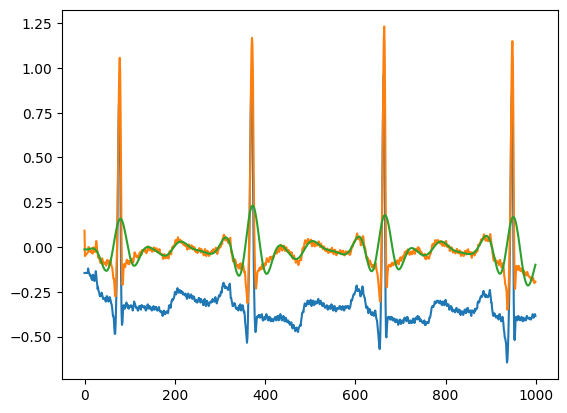

In [12]:
#hp:
plt.plot(MLII_100[0][:1000])
hamm_hp = hamming(200) * h_hp(M, fc_norm_hp)
hamm_hp_output = np.convolve(MLII_100[0][:1000], hamm_hp, 'same')
plt.plot(hamm_hp_output)
hamm_lp = hamming(200) * h_lp(M, fc_norm_lp)
hamm_lp_output = np.convolve(hamm_hp_output, hamm_lp, 'same')
plt.plot(hamm_lp_output)

### Różniczkowanie i potęgowanie

In [13]:
def y(x):
    params = [-1/8, -1/4, 0, 1/4, 1/8]
    out = np.convolve(x, params, 'same')
    return out

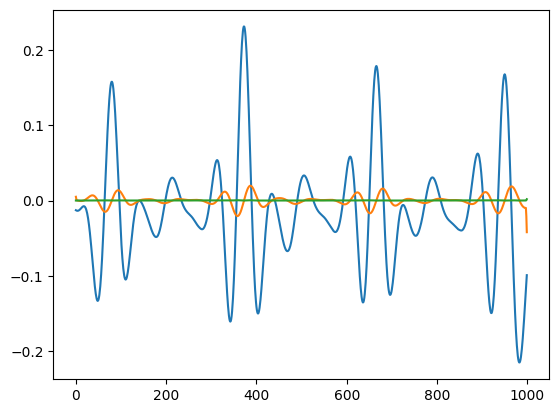

In [14]:
plt.plot(hamm_lp_output)

diff = y(hamm_lp_output)

plt.plot(diff)

pwr = diff ** 2

plt.plot(pwr)

### Całkowanie

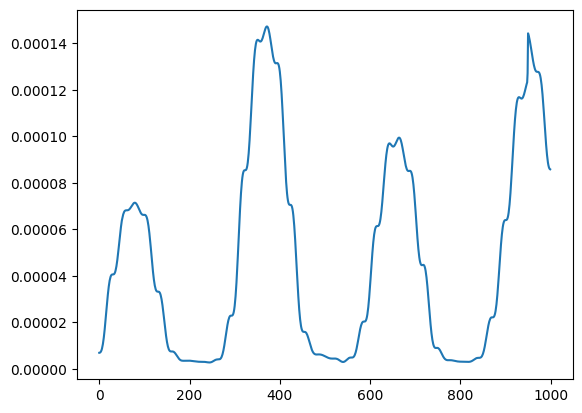

In [15]:
C = 100
C_params = np.ones(C)/C
integrated = np.convolve(pwr, C_params, 'same')

plt.plot(integrated)


### Progowanie

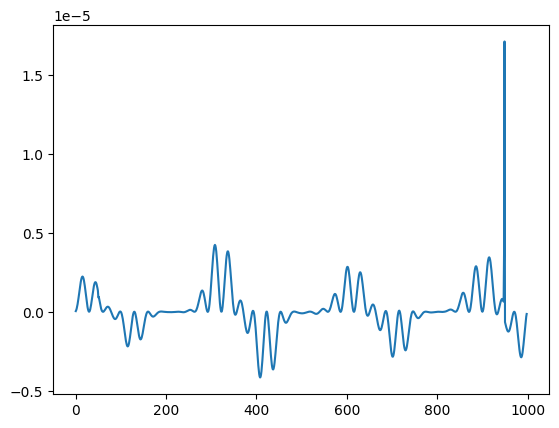

In [25]:
derivative = []
for i in range(1, len(integrated)):
    derivative.append(integrated[i] - integrated[i-1])
    
plt.plot(derivative)
    
zero_crossings = []
for i in range(1, len(derivative)):
    if derivative[i] * derivative[i-1] < 0:
        zero_crossings.append(i)
        
maxima = []
for i in zero_crossings:
    if i > 0 and derivative[i-1] > 0:
        maxima.append(i)